In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
print('Defyning Hyperparameters')
epselon = 0.1
learning_rate = 0.005
epochs = 1000

Defyning Hyperparameters


In [ ]:
print('Creating The Model')
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=2, input_shape=(1,2), activation=tf.sigmoid))
model.add(tf.keras.layers.Dense(units=4, activation=tf.sigmoid))
model.add(tf.keras.layers.Dense(units=1))

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

Creating The Model


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 2)              6         
                                                                 
 dense_1 (Dense)             (None, 1, 4)              12        
                                                                 
 dense_2 (Dense)             (None, 1, 1)              5         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [ ]:

feature = ([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]])
label   = ([0.0, 1.0, 1.0, 0.0])

feature = np.array(feature)
label = np.array(label)
feature = feature.reshape(4,1,2)
label = label.reshape(4,1)
print(feature.shape)
print(label.shape)

(4, 1, 2)
(4, 1)


In [ ]:
print('Training The Model')
history = model.fit(x=feature,
                        y=label,
                        epochs=epochs)

Visualising The Loss Curve


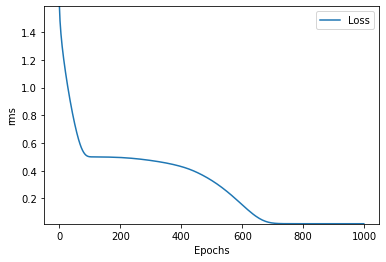

In [ ]:
print('Visualising The Loss Curve')
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('rms')
epochsss = history.epoch
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]
plt.plot(epochsss, rmse, label='Loss')
plt.legend()
plt.ylim([rmse.min()*0.97, rmse.max()])
plt.show()

In [ ]:
print('Testing The Model.')
t_feature = ([[0.0, 0.0],[0.0, 1.0]])
t_label   = ([0.0, 1.0])
t_feature = np.array(t_feature)
t_label = np.array(t_label)
t_feature = t_feature.reshape(2,1,2)
t_label = t_label.reshape(2,1)
model.evaluate(t_feature, t_label)

Testing The Model.
1/1 [==============================] - 0s 183ms/step - loss: 3.2284e-04 - root_mean_squared_error: 0.0180


[0.00032283866312354803, 0.01796771213412285]

In [ ]:
print('Running The Model.')

def predict(inputs):
    inputs = np.array(inputs)
    inputs = inputs.reshape(1,1,2)
    yy =model.predict(inputs)
    if abs(yy) < epselon:
        return 0
    elif abs(yy - 1.0) < epselon:
        return 1
    else:
        return -1
print('--------------------------')
print('-- A --- B -------- Res --')
print('--------------------------')
for i in feature:
  print('--',int(i[0][0]),'---',int(i[0][1]),'-------- ',predict(i[0]))
print('--------------------------')

Running The Model.
--------------------------
-- A --- B -------- Res --
--------------------------
-- 0 --- 0 --------  0
-- 0 --- 1 --------  1
-- 1 --- 0 --------  1
-- 1 --- 1 --------  0
--------------------------
